<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars/sem_2/yYGiBqtirSM.jpg" height="300" width="300"> 

# <center> R для тервера и матстата. <br>  <br> Домашка номер раз! </center>

Данный ноутбук является домашкой по курсу «R для теории вероятностей и математической статистики» (РАНХиГС, 2019). Автор ноутбука - [вот этот парень по имени Филипп.](https://vk.com/ppilif) Если у вас для него есть деньги, слава или женщины, он от этого всего не откажется. Ноутбук распространяется на условиях лицензии [Creative Commons Attribution-Share Alike 4.0.](https://creativecommons.org/licenses/by-sa/4.0/) При использовании обязательно упоминание автора курса и аффилиации. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу курса.](https://fulyankin.github.io/r_probability/) На ней можно найти другие материалы. Фрагменты кода, включенные в этот notebook, публикуются как [общественное достояние.](https://creativecommons.org/publicdomain/zero/1.0/)

----------------------

Приветствую вас внутри первой домашки. У каждой домашки должны быть свои герои (но это не точно). Моими героями являетесь вы! Вы - герои не потому, что я хочу кого-то простебать или обидеть, а потому что, когда любишь, хочется увековечить. Кто-то называет именами любимых людей вновь открытые звёзды и острова, кто-то созданную для нира папку на рабочем столе, а кто-то делает их героями своих историй. Будем искренне верить и надеяться, что я не Джордж Мартин, и в моих историях никто не погибнет. 

__Краткий брифинг:__


* __Дедлайн:__ __12.05.19__
* Первая домашка затрагивает то, что мы смотрели на первых двух парах.
* Тетрадка делится на две части: __рыбёшки (60 баллов) и кит (40 баллов).__
* Часть задач нужно решить не только с помощью симуляций, но и вручную.
* Ваша команда пытается решить как можно больше задач и присылает их мне.
* Если очень хочется, можем устроить после всех дедлайнов серию из пар с разбором домашек. 
* Свои решения постараюсь выложить после дедлайна.
* __WARNING:__ [на страничке курса](https://fulyankin.github.io/r_probability/) есть решение домашек прошлого года. Ими можно пользоваться. 

---------------------------

* __Как оформлять домашки:__ 
    1. Компьютерные домашки оформляем либо в связке R + LaTeX, либо в юпитерских тетрадках (если хочется новых технологий), либо в связке R + Markdown. Все шаблоны для этого есть в репозитории. Пожалуйста не нужно присылать мне просто тупой код с выводами в виде комментариев, написанных через решёточки. Я от этого могу сойти с ума. 
    2. Ручные решение можно оформлять двумя способами: либо вбивать их в файл вместе с кодом. Благо в Markdown, юпитере и других местах поддерживаются теховские формулу. Либо аккуратно оформляйте их на бумаге и присылайте свёрстанную pdf-ку. Не надо кидать мне фотки по одной. Я от этого тоже сойду с ума. Вариант с вбиванием в основной файл - предпочтительнее. 
    
* На странице курса висит [видео-инструкция по оформлению.](https://yadi.sk/i/Pxp_pByP6Em9-A)

---------------------------

Ближе к делу. С чего начинается любой скрипт? Правильно! С подгрузки пакетов :) 

In [1]:
library("ggplot2")  # Пакет для красивых графиков 
library("grid")     # Пакет для субплотов

# Отрегулируем размер картинок, которые будут выдаваться в нашей тетрадке
library('repr')
options(repr.plot.width=4, repr.plot.height=3)

# Внимание! Если вы делаете дз в Rstudio, то вам не нужны пакеты grid, repr и т.п.
# Вам нужен только пакет ggplot2! 

## Полезные функции:

In [2]:
rep(2, 5)  # повторяет число 2 целых 5 раз

[1] 2 2 2 2 2

In [3]:
seq(0, 1, 0.2)  # выдаёт все числа от 0 до 1 с шагом 0.2 

[1] 0.0 0.2 0.4 0.6 0.8 1.0

In [4]:
x <- c(1, 2, 3)
y <- c(2, -1, 4)
z <- c(3, 5, 2)

pmin(x, y, z)   # находит поэлементные минимумы во всех векторах

[1]  1 -1  2

In [5]:
which.max(x) # выдаёт позицию максимума

[1] 3

In [6]:
cumprod(x)  # кумулятивное (накапливающееся) произведение
# 1, 1*2, 1*2*3 и тд

[1] 1 2 6

In [7]:
cumsum(x)  # кумулятивная сумма
# 1, 1 + 2, 1 + 2 + 3 и тд 

[1] 1 3 6

In [8]:
# В R можно писать вот такие пафосные циклы:
# item будет по очереди принимать все значения из списка c(5,77,3)
# это питоновский стиль написания циклов, привыкайте :)

for(item in c(5,77,3)){
    print(item^2)
}

[1] 25
[1] 5929
[1] 9


## 1. Мелкие рыбёшки

В этом разделе вас ждёт много довольно простых задачек. 

### [2]  Задачка 1 (скучная) 

В R [куча встроенных наборов данных.](https://vincentarelbundock.github.io/Rdatasets/datasets.html) Например, в наборе данных `women` лежит немного данных про рост и вес американских женщин. 

In [9]:
head(women,5)  # команда head позволяет посмотреть на
               # первые пять строк таблички 

height,weight
58,115
59,117
60,120
61,123
62,126


* Постройте гистограмму с распределением веса женщин
* Постройте эмпирическую функцию распределения для веса женщин
* Постройте scatterplot веса и роста

Найдите базовые характеристики распределения:

* средний вес женщины
* медианный вес женщины
* дисперсию веса женщины
* среднее квадратическое отклонения веса женщин
* эмпирические квантили уровня 5%, 50% и 95%. 
* правда ли, что 50% квантиль совпал с медианой? А почему?
* почему я выбрал для этого задания именно этот датасет?  **(За правильный ответ на этот вопрос плюс 4 балла)**

In [ ]:
# немного кода для решения задачи 

### [2]  Задачка 2 
Случайная величина $X$ имеет распределение Пуассона с $\lambda = 2$. Иногда пишут, что $X \sim Pois(2)$. С помощью симуляций оцените $P(X > 10)$, $P(X > 10 \mid X > 5)$, $P(X > 5 \cap X < 7)$, а также $E(X^7)$ и $E(X \mid X > 5)$. 

In [ ]:
# чуть побольше кода для решения задачи

### [1] Задачка 3 

Предположим, что вы получаете в среднем три спам-письма в день. Какова доля дней, в которые вы получаете пять или больше спам-писем?

In [ ]:
# совсем мало кода для решения задачи

### [4] Задачка 4

Куратор Вова случайным образом с возможностью повторов выбирает $5$ натуральных чисел от $1$ до $100$. После выбора он раздаёт эти числа $5$ второкурсникам. Каждый второкурсник берёт экспоненциальное распределение $Exp(\lambda_i)$, где $\lambda_i$ - число, выданное Вовой, и выбрасывает из него случайное число. Получаются случайные величины $X_1, X_2, X_3, X_4$ и $X_5$. 

После этого Вова собирает все выпавшие числа назад и вычисляет 

$$ Y_1 = \min(X_1, \ldots, X_5), \qquad Y_2 = \max(X_1, \ldots, X_5),$$

а также 

$$ Z = \frac{Y_1}{Y_1 + Y_2}.$$

С помощью симуляций оцените: 

a) $P(Y_2 > 3 Y_1)$

б) $E(Z)$ и $Var(Z)$ 

в) $P(Y_2 > 3 \cdot Y_1 \mid Z > 0.5)$

г) $E(Z \mid X_1 > 80)$

д) $Corr(Z, Y_1)$, $Corr(Z, Y_2)$, $Corr(Y_1, Y_2)$

е) постройте гистограмму для случайной величины $Z$


In [ ]:
# среднее количество кода для решения задачки 

### [2] Задачка 5

Юра завёл себе две нейросетки и два сервера и начал их обучать. Две нейросети обучаются независимо на двух серверах. Время их обучения $T_1$ и $T_2$ равномерно распределено на отрезке $[1;3]$ (обучение измеряется в минутах). В процессе обучения сервер может упасть. Момент падения сервера $T$ распределён экспоненциально с параметром $\lambda = 0.3$. Момент падаения сервера не зависит от времени обучения нейросеток. Известно, что одна из нейросетей успела обучиться, а вторая не успела. Какова вероятность того, что $T \le 1.5$?

**Hint:** при решении задачи помните о том, что у вас две нейросетки!

In [ ]:
# немного кода для решения задачки, будет позорно, если Юра её не сможет решить...

### [4] Задачка 6

Каждый день Света съедает случайное количество булочек, которое распределено по Пуассону с параметром $10$. Логарифм затрат в рублях на каждую булочку распределён нормально $N(2,1)$. Ксюша каждый день съедает биномиальное количество булочек $Bin(8, 0.5)$. Затраты Ксюши на каждую булочку распределены равномерно на отрезке $[2;20]$. 

а) Сколько в среднем Света тратит на булочки за день? 

б) Чему равна дисперсия дневных расходов Светы? 

в) Какова вероятность того, что за один день Света потратит больше денег, чем Ксюша? 

г) Какова условная вероятность того, что Света за день съела больше булочек, чем Ксюша, если известно, что Ксюша потратила больше денег? 

In [ ]:
# придётся написать немного кода 

### [3] Задачка 7

Удав Анатолий любит французские багеты. Длина французского багета равна $1$ метру. За один заглот Удав Анатолий заглатывает кусок случайной длины, равномерно распределённый на отрезке $[0;1]$. Для того, чтобы съесть весь багет удаву потребуется случайное количество $N$ заглотов. 

Найдите $E(N)$ и $Var(N)$. Как поменяются ответы, если багет имеет длину $2$ метра? 

Кстати говоря, эту задачку можно решить руками с помощью метода первого шага. Его мы разберём на второй паре. Правда для этого придётся выписать систему из двух уравниний с интегралами. В сборнике сложных задач по терверу, [культурном коде,](https://github.com/bdemeshev/probability_dna/raw/master/probability_dna.pdf) можно найти три разных решения этой задачки. Она там находится под номером $46$.

In [ ]:
# ваш код

### [2] Задачка 8

На шнуре длиной $1$ м случайным образом делают два разреза. С какой вероятностью хотя бы один из получившихся кусков будет длиннее $0.5 м$?



In [ ]:
# ваши супер-пуперрр вычисления

### [2] Задачка 9 

Семён любит мешать не только джим бим с колой, но и распределения! И вот сейчас две трети её данных идут в смесь из экспоненциального распределения с параметром $\lambda = 1$, а остальная треть из стандартного нормального. Как это часто бывает, Сёма сначала намешал, а потом чёт подумал-подумал и всё Диме отдал. И теперь у Димы проблема со свойствами намешанного распределения.

Сгенерируйте выборку из распределения Сёмёна и помогите Диме оценить математическое ожидание и дисперсию случайной величины, постройте гистограмму. 

In [ ]:
# немного кода во благо Оли!

### [3] Задачка 10

Помните? Мы всё это изучаем, чтобы решать реальные проблемы! С помощью генераций в R мы можем оценить любое математическое ожидание и любые вероятности. Нам позволяет сделать это великий и могучий фундаментальный ЗБЧ!

Давайте попробуем проверить несколько свойств математических ожиданий и дисперсий, которые вы доказали на лекциях по теории вероятностей в прошлом семестре. Выберите конкретные случайные величины (любые) и проверьте для них утверждения, перечисленные ниже. 

a) Верно ли, что $E(X + Y) = E(X) + E(Y)$? 

b) Верно ли, что $E(X \cdot Y) = E(X) \cdot E(Y)$?

c) Верно ли, что $Var(X + Y) = Var(X) + Var(Y) + 2 \cdot Cov(X,Y)$? 

d) Верно ли, что $Var(X \cdot Y) = Var(X) \cdot Var(Y)$? 

e) Верно ли, что если $Cov(X, Y) = 0$, то две случайные величины независимы? Удастся ли проверить это с помощью генераций? 

In [ ]:
# ваша проверка свойств на какой-нибудь случайной величине, что люба вашему сердцу

### [4] Задачка 11

Филя и Никита решили попытать счастье и попасть на стажировку в ЦБ. В качестве вступительного испытания, они получили листочки с задачками по терверу и случайным процессам. Одна из задач из листочка выглядела следующим образом:

Пусть $X \sim N(0, \sigma^2)$. Пусть $\Phi(x)$ — функция распределения для $N(0,1)$. Нужно найти математическое ожидание для случайной величины $\Phi(X)$. 

Собеседователи, дав Филе и Никите задание, сказали, что у них 2 часа, и куда-то ушли. Пользоваться можно чем угодно (но это не точно). В голове у парней есть какое-то решение. Правда они в нём не уверены. Зато у них с собой есть ноутбуки. Помогите Филе и Никите оценить $E(\Phi(X))$ с помощью симуляций. Постройте для случайной величины $\Phi(X)$ гистограмму. Возьмите $\sigma = 1$, после $\sigma = 3$, после $\sigma = 100$. Как ведут себя математическое ожидание и распределение при росте десперсии?

__P.S.__ На стажировку в ЦБ парни конечно же не попали.

In [ ]:
# ваши полурисёрческие изыскания 

### [6] Задачка 12

__За генерацию можно получить только 1 балл. Она, блин, делается в две строчки. Остальное ставится за ручное решение.__

Чтобы получить на посвяте стакан Уколовки, разлитый лично Димой Генераловым, нужно решить задачку по терверу. Случайные величины $X$, $Y$ и $Z$ равномерны на отрезке $[0;1]$ и независимы. Диму интересует случайная величина $(XY)^Z$. Ему очень интересно было бы узнать её распределение. 

In [ ]:
# генерация

Это было довольно просто, не так ли? Давайте займёмся кое-чем более интересным, попробуем найти плотность распределения случайной величины $(XY)^Z$ вручную. Это не особо сложно. Перед нами просто-напросто возникнет несколько интегралов, которые придётся взять.


a) Какое распределение имеет случайная величина $- \ln X$? 

б) Какое распределение у случайной величины $-(\ln X + \ln Y)$

в) Найдите функцию распределения для случайной величины $-Z (\ln X + \ln Y)$

г) Наконец вы готовы ответить на главный вопрос: какое распределение у $(XY)^Z$.

Задача, как и Удав Анатолий из [культурного кода.](https://github.com/bdemeshev/probability_dna/raw/master/probability_dna.pdf) Но её решения там нет.

In [ ]:
# ручное решение :3 

### [2] Задачка 13

Пока все однокурсники Самира занимались одномерными случайными величинами, он увлёкся матрицами. И вот теперь он хочет пропихнуть свои увлечения в теорию вероятностей. Самир собирается сгенерировать случайную квадратную матрицу $A$, где каждый элемент матрицы взят из равномерного на $[0;1]$ распределения. 

Пусть случайная величина $X$ — это определитель случайной матрицы. Помогите Самиру найти $E(X)$. Чему равна вероятность того, что матрица $A$ вырождена? Постройте для этой случайной величины гистограмму. 

Пусть случайная величина $Y$ — это самое большое собственное значение этой матрицы. Помогите Самиру найти $E(Y)$. Постройте гистограмму. 

Перед тем как решать задачу, выскажите свои априорные представления относительно этих распределений, опираясь на свою интуицию и знание линала. Подтвердились ли они? 

In [ ]:
# ваши генерации

### [4] Задачка 14

Закон больших чисел — это теорема, которая позволяет людям зарабатывать деньги! В 1600-х годах люди научились составлять актуарные таблицы. Это такие таблицы, где указана ожидаемая продолжительность жизни для данного возраста и пола. Люди начали собирать данные о смертности и оценивать вероятность дожития человека до определённого возраста. На этом строились тарифы на страхование. 

Появление подобных таблиц обязано зарождению в течение 1600-х годов теории вероятности, которая впервые объяснила людям как случайные вещи при достаточно больших масштабах сглаживаются и становятся очень даже предсказуемыми. Надо признать, что у страхования было довольно трудное детство — как раз потому, что люди плоховато понимали концепцию вероятности. В голове довольно трудно удержать её. Многие люди и по сей день ошибочно думают, что могут влиять на случайность каким-то образом. Например, некоторые думают, что чаще других выбрасывают на кубике шестёрки. Более того, люди довольно плохо понимают условные вероятности. 

Несмотря на всё это недопонимание, страховые компании в наше время на диверсификации рисков делают кэш. Давайте представим, что мы в их шкуре и замутим простенький бизнес, связанный со страховками. Конечно же бизнес мы будем делать в России. Для того, чтобы как следует сделать его, мы нашли [актуарные таблицы для России 2009 года выпуска.](https://yadi.sk/i/-k-9kB263Uv8uH)

In [10]:
df = read.csv('/Users/fulyankin/Yandex.Disk.localized/R/R_prob_data/aktuar2009.csv', sep=';', dec=',')
head(df)

X,Мужчины.и.женщины.город,Мужчины.город,Женщины.город,Мужчины.и.женщины.село,Мужчины.село,Женщины.село
0 лет,0.992525,0.991658,0.993442,0.990321,0.989209,0.991496
1 год,0.999307,0.999221,0.999397,0.998812,0.998709,0.998921
2 года,0.999558,0.999517,0.999601,0.999358,0.999298,0.999420
3 года,0.999668,0.999609,0.999730,0.999441,0.999288,0.999601
4 года,0.999700,0.999671,0.999731,0.999524,0.999445,0.999607
5 лет,0.999695,0.999636,0.999757,0.999515,0.999444,0.999589


В табличке находится вероятность того, что человек проживёт конкретный год. В первой строке вероятность дожить до года, во второй до 2 лет, если человек уже дожил до года и так далее. Значит, если мы хотим узнать, какова вероятность того, что человек проживёт два года, мы должны умножить вероятность прожить первый год на вероятность прожить второй год. Из части __полезные функции,__ которая была в самом начале, можно узнать, что посчитать такую вероятность, помогает функция `cumprod`. Давайте посмотрим каково в России живётся женщинам и мужчинам. 

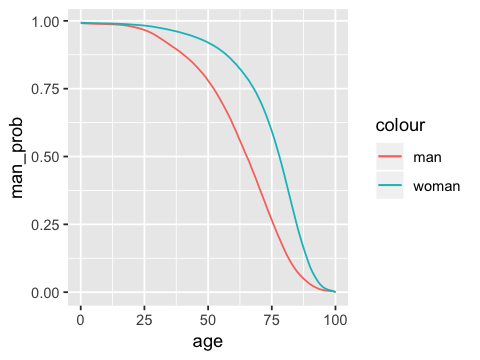

In [11]:
df['age'] = 0:100
df['man_prob'] = cumprod(df[,3])   # вероятность дожить до какого-то возраста
df['woman_prob'] = cumprod(df[,4])

ggplot(df, aes(age))+
    geom_line(aes(y=man_prob, colour = "man"))+
    geom_line(aes(y=woman_prob, colour = "woman"))

Что мы видим? А ничего хорошего. Рыжая кривая — вероятность того, что мужчина доживёт до конкретного возраста. Голубая - женщина. Женщины намного живучее, чем мужчины. Страховать их от несчастий намного выгоднее. Было бы интересно узнать насколько это выгоднее. Будем смотреть на женщин и мужчин, которые живут в городах. 



- Пусть мы продаём страховки только 25-летним городским дамам. Сколько нужно клиентов, чтобы с вероятностью 99% прибыль оказалась положительной.

- Пусть мы продаём страховки только 60-летним городским дамам по той же цене. Сколько нужно клиентов, чтобы с вероятностью 99% прибыль оказалась положительной. 

Для простоты будем предполагать, что выплата в случае смерти составляет $10^6$ рублей.

In [ ]:
# ваш код

* Выясните, начиная с какого возраста страховка для мужчин стоит дешевле, чем страховка для женщин. 

In [ ]:
# ваш код

### [6]  Задачка 15 (Парадокс дней рождений)


Вы когда-нибудь слышали про парадокс дней рождений? На википедии есть статья. Остановитесь, не нужно её гуглить. Давайте попробуем поразмышлять. Как думаете, какова вероятность того, что в комнате, в которой находится $23$ человека, хотя бы у двоих из них дни рождения совпадают (не у вас с кем-нибудь совпадёт, а у двоих произвольных людей)? 

__Внимание, ответ:__ вероятность этого $0.5$. Если в комнате $50$ человек, то вероятность этого возрастает до $0.97$. Получается, что если вы находитесь в большой аудитории, то вы смело можете ставить деньги на то, что в ней дни рождения у каких-нибудь двух произвольных людей совпадут. Делая такие ставки довольно часто, вы сможете обогатиться. Конечно же, иногда вы будете проигрывать, но математическое ожидание такой игры будет суперположительным. Например, если вы будете ставить $1000$ рублей, ваш ожидаемый выигрыш составит

$$
E(X) = 0.97\cdot1000 - 0.03\cdot1000.
$$ 

Слабо найти вероятность того, что хотя бы у двоих людей из $n$ дни рождения совпадут? Если слабо, добро пожаловать на [википедию.](https://ru.wikipedia.org/wiki/Парадокс_дней_рождения)

Почему нам трудно в это поверить? Ответ математический: степени трудно осознать. Как визирь в [древней задаче про шахматы и зёрнышки,](https://ru.wikipedia.org/wiki/Задача_о_зёрнах_на_шахматной_доске) мы плохо понимаем степенную функцию. Даже если мы подучились математике и статистике, это всё равно как-то непривычно. Вот пример неправильной логики: какова вероятность выпадения $10$ решек подряд?

Нетренированный мозг может составить примерно такую цепочку мыслей: одна решка - $50%$, две решки - $25%$. Значит, десяток решек в $10$ раз труднее, ну то есть $5%$. Ну вот мы и облажались. Реальный шанс это $0.5^{10}$. Ошиблись немного. Примерно в $50$ раз.

Итак, в произвольной группе из $50$ человек вероятность того, что хотя бы у двоих людей дни рождения совпадут, равна $0.97$. Но это всё только в теории. При решении задачи мы предполагаем, что рождения людей равномерно распределены в течение года. Однако на практике это может быть не так. В связи с этим реальная вероятность может отличаться от теоретической. 

В этой задачке вам предстоит проверить парадокс дней рождений на эмпирических данных. В табличке `vk_bdates.csv` лежит информация о $4589300$ пользователей из вконтакте. В табличке можно найти данные о имени пользователя `first_name`, его поле `sex`, его родном городе `home_town`, городе проживания `city`, дне `bdate`, месяце `bmonth` и годе `byear` рождения. Также там лежит информация о том удалена ли его страничка `deactivated`. 

__[3] Простая часть (её решение можно найти во второй домашке прошлого года):__ 

Попробуйте на основе данных из этой таблички проверить парадокс дней рождений. Проверять его мы будем, конечно же в R. __Обратите внимание, что часто придётся прогонять один и тот же код. Не надо его копировать. Оформите его в виде функции.__ От вас требуется: 

1. Удалить из таблички всех людей, чьи страницы были забанены или удалены.
2. Удалить из таблички всех людей, для которых недоступны день и месяц рождения.
3. Постройте гистограмму, на которой было бы понятно в какой месяц родилось какое количество людей. Команда для этого приведена ниже. Как считате, помесячная рождаемость имеет равномерное распределение?
4. Постройте точно такую же гистограмму для дней рождений. Вас ждёт небольшой сюрприз. Избавьтесь от этого сюрприза, чтобы он не замусоривал данные. Как считате, подневная рождаемость имеет равномерное распределение? 
5. Эмпирически оцените вероятность того, что в группе из 50 произвольных людей найдутся хотя бы двое с одинаковым днём рождения. Для этого напишите цикл, в ходе которого из таблички с помощью команды `sample` будет делаться подвыборка из 50 строк. Для этих 50 строк внутри условия вы должны проверить совпадение дней рождений. Если совпало, то нужно запомнить это в переменную счётчик, которую вы впоследствии, чтобы получить вероятность, поделите на длину цикла. 
6. Попробуйте проделать ту же оценку отдельно для подмножества женщин и подмножества мужчин. Насколько оценки вероятностей разнятся? 

__Таблица тут: https://yadi.sk/d/hcysIe6d3Uv8rr__

In [13]:
df = read.csv('/Users/fulyankin/Yandex.Disk.localized/R/R_prob_data/vk_bdates.csv', sep='\t', dec='.')

dim(df)   # размер таблицы
head(df,10)  # её шапочка 

[1] 4589300      11

X,city,deactivated,first_name,home_town,id,last_name,sex,byear,bmonth,bday
0,Москва,,Илья,,5,Перекопский,2,NA,11,18
1,Санкт-Петербург,,Николай,,6,Дуров,2,NA,NA,NA
2,Санкт-Петербург,,Михаил,Санкт-Петербург,11,Петров,2,NA,12,18
3,Санкт-Петербург,,Татьяна,,34,Плуталова,1,NA,NA,NA
4,,banned,Габриел,,47,Шалел,2,NA,NA,NA
5,,,Сергей,,57,Владимиров,2,NA,NA,NA
6,Москва,,Людмила,,71,Романченко,1,NA,2,7
7,Санкт-Петербург,,Наташа,,74,Филимонова,1,1988,7,18
8,,banned,Давид,,79,Спектер,2,NA,NA,NA
9,Санкт-Петербург,,Фёдор,Санкт-Петербург,84,Медведев,2,NA,NA,NA


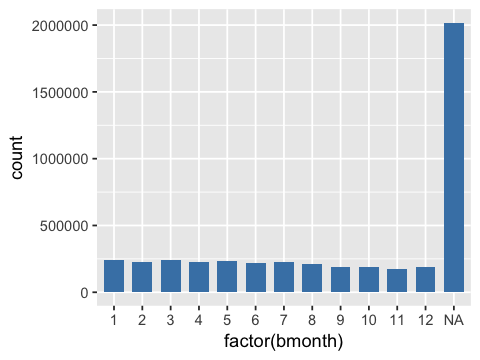

In [14]:
# Когда будете строить такой график, избавьтесь от колонки NA
# Это позволяет сделать грамотное выполнение 1 и 2 пунктов инструкции :) 
ggplot(df, aes(x=factor(bmonth)))+
  geom_bar(stat="count", width=0.7, fill="steelblue")

In [ ]:
# Код, который вы скатали с домашки прошлого года, но при этом поняли и осмыслили! 

__[3] Простая часть, решения которой в домашке прошло года нет__

1. Сколько в итоговой, прошедшей все фильтры из предыдущего пункта, выборке есть уникальных имён? Какое мужское имя самое популярное? Какое женское имя самое популярное? Постройте гистограмму для 30 самых популярных имён.  
2. Оцените вероятность того, что в группе из 50 произвольных людей найдутся хотя бы двое с одинаковыми именами. Она оказалась больше или меньше, чем в пункте про дни рождения?
3. Разнятся ли эти вероятности между мужчинами и женщинами? 

In [ ]:
# Доказательство того, что вы осмыслили скатаный в прошлой части задачи код.

### [2] Задачка 16

Предположим, что рост $100$ второкурсников распределен нормально со средним $175$ см и стандартным отклонением $8$ см. Если сделать выборку в $5$ человек и посчитать по ней средний рост $\bar x$, то какими будут $E(\bar x)$ и $Var(\bar x)$, если выборки делаются 
	 
а) с возвращением, то есть наблюдения $x_1, \ldots, x_5$ производятся независимо;
	 	
б) без возвращения, то есть наблюдения зависимы.

Решите задачу вручную и проверьте своё решение с помощью симуляций.

In [ ]:
# ваше ручное решение и проверка

### [2]  Задачка 17

У Маши 30 разных пар туфель. И она говорит, что мало! Пёс Шарик утащил без разбору на левые и правые $17$ туфель. Какова вероятность того, что у Маши останется ровно $13$ полных пар? Пусть случайная величина $X$ — число полных пар у Маши. Найдите $E(X)$ и $Var(X)$.

Решите задачу вручную и проверьте своё решение с помощью симуляций.

In [ ]:
# ваше ручное решение и проверка

### [3]  Задачка 18 

ЛСП постоянно подбрасывает монетку и орёт "орёл - решка". 
	
* Когда выпадает $OPOP$,  ЛСП успокаивается и ныряет в ванну. Сколько в среднем раз ему нужно подбросить монетку, чтобы нырнуть?
* Когда выпадает комбинация $POPP$, ЛСП просто теряется в мире цифрового глянца. Сколько в среднем раз ему нужно подбросить монетку, чтобы потеряться? 
* Пусть теперь ЛСП хочет получить любую из этих двух комбинаций. Какова вероятность того, что ЛСП потеряется, а не нырнёт, то есть что $POPP$ появится раньше,  чем $OPOP$? 

Решите задачку вручную и проверьте своё решение с помощью симуляций.

In [ ]:
# решение руками да на компухтере

### [2] Задачка 19

Решите задачки вручную: 

* $k$ различных космонавтов собираются высадиться на $m$ различных планет. Каждый космонавт выбирает себе планету независимо и равновероятно. Пусть $X$ — количество планет, на которые никто не высадился. Найдите $E(X)$.

* В ряд стоят $n$ гномов. Издали на них смотрит дракон. Гномы разной высоты. Сколько в среднем гномов видит дракон? Какова дисперсия числа увиденных гномов?

In [ ]:
# ЧЁ ЖДЁШЬ? РЕШАЙ! 

### [4]  Задачка 20

Илье Муромцу предстоит дорога к камню. И от камня начинаются ещё три дороги. Каждая из тех дорог снова оканчивается камнем. И от каждого камня начинаются ещё три дороги. И каждые три дороги кончаются камнем.... И так далее до бесконечности. На каждой дороге можно встретить живущего на ней трёхголового Змея Горыныча с вероятностью (хм, вы не поверите!) одна третья. Какова вероятность того, что у Ильи Муромца существует возможность пройти свой бесконечный жизненный путь, так ни разу и не встретив Змея Горыныча? 

Решите задачу вручную и проверьте своё решение с помощью симуляции. 

**Hint:** наверное, лучше всего делать симуляции с помощью рекурсивной функции на походы Ильи Муромца.

In [ ]:
# Ваше решение и кодище, желательно АДСКИЙ КОДИЩЕ

## 2. [40+] Кит-рисёрчер

**Добро пожаловать в Кита. Кит — это большая рисёрчерская задача с огромным количеством вопросов. В ките есть как ручные вопросы, так и вопросы для симуляций. За каждый вопрос даётся какое-то количество баллов. В каких-то вопросах требуется решить задачу руками на бумажке. В каких-то вопросах требуется произвести симуляцию в R. Продвинтесь в своём рисёрче над этим китом как можно глубже и срубите куш из баллов.** 

**Частично решение этого кита можно найти в логах предыдущего года. Если на вас нападёт отчаяние, можете заглянуть в них.** 

Эконом играет в киллера! Всего участие в игре принимает $100$ человек. Краткие правила игры: 

1. Каждый игрок одновременно и убийца и жертва. 
2. Игроку даётся конверт, в котором лежит имя человека, которого он должен убить. 
3. Сам игрок также находится у кого-то в конверте. Нужно не допустить своей смерти. 
4. Чтобы убить другого игрока, надо оказаться с ним наедине и застрелить из пальца. 
5. Жертва убитого становится новой жертвой игрока. 
6. Побеждает тот, кто совершит наибольшее число убийств. 

Организаторы игры сразу же столкнулись с несколькими проблемами. Первая проблема - это __суицидники.__ Если Максиму в конверте попался Максим, то Максим должен убить сам себя. Он - суицидник.  В такой ситуации организаторам придётся поменять конверт. Хотелось бы, чтобы подобных ситуаций было как можно меньше.

**a)[1]** Какова вероятность, что суицидником окажется именно Максим? Найдите эту вероятность руками. 

**б) [1]** Оцените с помощью симуляций вероятность того, что хотя бы один человек получит в конверте сам себя.

In [ ]:
# Напиши немного кода, будь умничкой

**в) [2]** Найдите руками вероятность того, что хотя бы один человек получит сам себя. 

**г) [2]** Пусть случайная величина $X$ - количество суицидников. Оцените $E(X)$ с помощью симуляций. Проинтерпретируйте величину $E(X)$. Что она означает для организаторов игры? 

In [ ]:
# Ты уже чуток написал, напиши ещё немного

 **д) [2]** Найдите $E(X)$ руками.

Вторая проблема - это __мэтчинги__. Если у Глеба в конверте оказалась Аня, а у Ани в конверте оказался Глеб, то между ними возник мэтчинг. Когда игроки останутся наедине, они попробуют убить друг друга, и у них ничего не выйдет. Организаторам придётся заменить Ане и Глебу конверты с жертвами. 

**е) [1]**  Какова вероятность того, что мэтчинг возникнет именно между Аней и Глебом? 

**ж) [3]** Оцените вероятность того, что в раздаче возник хотя бы один мэтчинг. 

In [ ]:
# Поднажми! Задачка скоро расколется

**з) [3]** Пусть случайная величина $Y$ - количество мэтчингов. Оцените $E(Y)$. Проинтерпретируйте величину $E(Y)$. Что она означает для организаторов?

In [ ]:
# Ещё чуток кода и ты сможешь всё!

**и) [3]** Найдите $E(Y)$ руками.

__к) [1]__  Кроме мэтчингов в игре существуют цепи. Например, у Ахмеда в конверте могла оказаться Рита, у Риты Максим, а у Максима Ахмед. Игроки выстраиваются в цепь. После того как Рита убьёт Максима, а затем Ахмеда, цепь замкнётся, и у Риты окажется она же сама. Какова вероятность того, что в игре ни один игрок в ходе замыкания такой цепи не окажется сам у себя? 

__л) [х.з.]__ Вы понимаете, что любая раздача конвертов приводит к появлению какого-то количества подобных цепей. Каждая цепь — это какой-то граф. В итоговом графе может существовать различное количество компонент связности. Когда цепь в каждой из них замыкается, у человека в конверте оказывается он сам. Пусть случайная величина $Z$ — количество таких компонент, возникшее в игре при раздаче. Найдите $E(Z)$. Постройте для $Z$ гистограмму. 

Именно это я попросил сделать в прошлом году. Моё решение получилось довольно убойным. Его можно найти в прошлогодней домашке. Если вы сможете сделать это проще, накину баллов.

In [ ]:
# Ну тут ты скорее всего уже не напишешь кода

Усложняем ситуацию! Предположим, что на игру отводится $24 \cdot 60$ часов. Последовательность убийств — это поток событий. Время, которое проходит между убийствами описывается экспоненциальным распределением с параметром $\alpha = 0.08$.

__м) [1]__  Сколько в среднем проходит часов между убийствами? 

__н) [5]__  Какова вероятность того, что через $30$ дней в игре останется меньше $50$ человек? При симуляциях можно считать, что если в какой-то момент человек оказался в конверте сам у себя, он умирает. Если возник мэтчинг, умирают оба человека. Цепочку, на которой происходит убийство, выбирайте случайно на основе равномерного распределения.

In [ ]:
# Мало кто заполнит код здесь... 

__о) [5]__ Найдите математическое ожидание числа игроков, выживших после $30$ дней. 

In [ ]:
# Ну за этот пункт баллы точно никто не получит

Предположим, что со временем игра протухает. Поначалу всем весело и все хотят убивать, но ближе к середине энтузиазм скатывается в ноль. Пусть $\alpha$ в самом начале равна $0.08$. Каждые 48 часов она уменьшается в два раза.

__п) [5]__ Какова вероятность того, что через $30$ дней в игре останется меньше $50$ человек? Каково математическое ожидание выживших? 

In [ ]:
# Тут баллы тоже никто не получит 

Организаторы игры не хотят, чтобы игра протухла. Перед тем как запустить игру, они построили кучу симуляций и решили, что каждые $7$ дней в полночь они будут награждать самого топового убийцу специальным призом. Каждый раз, когда происходит награждение, $\alpha$ подскакивает на $0.02$. 

__р) [5]__ Какова вероятность того, что через $30$ дней в игре останется меньше $50$ человек? Каково математическое ожидание выживших?

In [ ]:
# Тут никто код не напишет и подавно, я реалист